[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyMPDATA.git/main?urlpath=lab/tree/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)

license: GPL v3   
authors: Sylwester Arabas, Michael Olesik, Piotr Bartman   
copyright: Jagiellonian University   
based on Fig. 1 from [Arabas & Farhat 2020](https://doi.org/10.1016/j.cam.2019.05.023)

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [1]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

In [2]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PyMPDATA_examples.asian_option.simulation import Simulation
from PyMPDATA_examples.asian_option.setup3_asian_option import Settings
# from PyMPDATA_examples.asian_option.setup1_european_corridor import Settings
from PyMPDATA_examples.asian_option.colors import colors

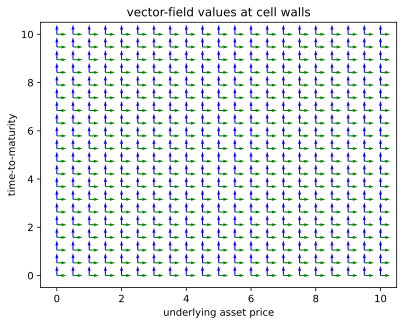

In [3]:
vel_a = 0.1
vel_x = 2
x_steps = 21
a_steps = 20
A = np.linspace(0, 10, a_steps)
X = np.linspace(0, 10, x_steps)
X, A = np.meshgrid(X, A)
fig, ax = pyplot.subplots()
# ax.quiver(X, A, vel_x, vel_a, color='red', label='vector-field values at cell centers')
ax.quiver(X, A, vel_x, 0, color='green', label='vector-field x-component values at cell walls')
ax.quiver(X, A, 0, vel_a, color='blue', label='vector-field a-component values at cell walls')
ax.set_xlabel("underlying asset price")
ax.set_ylabel("time-to-maturity")
ax.set_title("vector-field values at cell walls")
# ax.legend()
show_plot()


In [4]:
settings = Settings()
simulation = Simulation(settings)

self.S.shape=(40,), self.A.shape=(100,)
self.S_mesh.shape=(100, 40), self.A_mesh.shape=(100, 40)
advectee.shape=(100, 40)
a_dim_advector.shape=(40,)
a_dim_advector.shape=(101, 40)
x_dim_advector.shape=(100, 41) a_dim_advector.shape=(101, 40)
(array([[  17.95887952,   20.6870113 ,   23.82957332, ..., 3363.28970984,
        3874.20674753, 4462.73714653],
       [  17.95887952,   20.6870113 ,   23.82957332, ..., 3363.28970984,
        3874.20674753, 4462.73714653],
       [  17.95887952,   20.6870113 ,   23.82957332, ..., 3363.28970984,
        3874.20674753, 4462.73714653],
       ...,
       [  17.95887952,   20.6870113 ,   23.82957332, ..., 3363.28970984,
        3874.20674753, 4462.73714653],
       [  17.95887952,   20.6870113 ,   23.82957332, ..., 3363.28970984,
        3874.20674753, 4462.73714653],
       [  17.95887952,   20.6870113 ,   23.82957332, ..., 3363.28970984,
        3874.20674753, 4462.73714653]]), array([[0.03378399, 0.03378399, 0.03378399, ..., 0.03378399, 0.03378399

In [5]:
simulation.solvers[2].advectee.get()

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [2102.86212641, 2102.86212641, 2102.86212641, ..., 2102.86212641,
        2102.86212641, 2102.86212641],
       [2125.31122668, 2125.31122668, 2125.31122668, ..., 2125.31122668,
        2125.31122668, 2125.31122668],
       [2147.76032694, 2147.76032694, 2147.76032694, ..., 2147.76032694,
        2147.76032694, 2147.76032694]])

Text(0, 0.5, 'time-to-maturity')

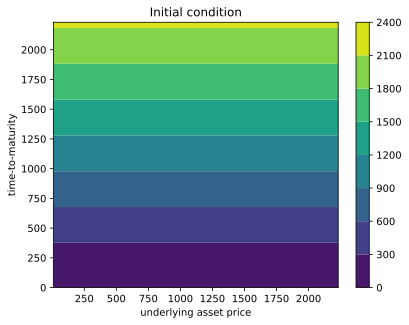

In [16]:
#do a 2d plot of the initial condition using the meshgrid and contourplot
fig, ax = pyplot.subplots()
CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, simulation.solvers[2].advectee.get())
fig.colorbar(CS, ax=ax)
ax.set_title("Initial condition")
ax.set_xlabel("underlying asset price")
ax.set_ylabel("time-to-maturity")



In [5]:
S = simulation.S
psi_T = simulation.solvers[1].advectee.get()
psi_0 = simulation.run(n_iters=2)
psi_a = settings.analytical_solution(S)

IndexError: index 202 is out of bounds for axis 0 with size 104

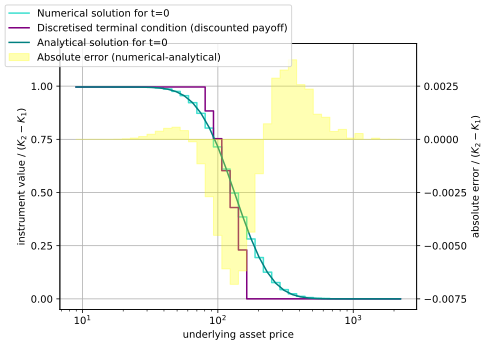

In [5]:
fig, ax1 = pyplot.subplots()
yscl = 1 / (settings.K2 - settings.K1)
ax2 = pyplot.twinx()
ax2.fill_between(S, yscl*(psi_0-psi_a), step="mid", label='Absolute error (numerical-analytical)', alpha=.3, color='yellow')
ax2.set_ylabel("absolute error / ($K_2-K_1$)")
ax1.step(S, yscl*psi_0, where='mid', label='Numerical solution for t=0', color=colors[2])
ax1.step(S, yscl*psi_T, where='mid', label="Discretised terminal condition (discounted payoff)", color=colors[0])
ax1.plot(S, yscl*psi_a, label='Analytical solution for t=0', color=colors[1])
ax1.set_xscale("log")
ax1.grid()
ax1.set_xlabel("underlying asset price")
ax1.set_ylabel("instrument value / ($K_2-K_1$)")
ax1.set_ylim((-.05, 1.2))
ax1.set_yticks(np.arange(0, 1.25, 0.25))
ax2.set_ylim((-.008,.0045))
ax2.set_yticks(np.arange(-.0075, .005, .0025))
fig.legend(loc='upper left')
show_plot()

In [ ]:
scl = settings.K2 - settings.K1
np.testing.assert_almost_equal(np.amax(psi_0 / scl), 1, decimal=2)

In [ ]:
scl = settings.K2 - settings.K1
np.testing.assert_almost_equal(np.amin(psi_0 / scl), 0, decimal=14)

In [ ]:
abserr = psi_0 - psi_a
maxabserr = np.amax(np.abs(abserr))
assert np.abs(abserr[0]) < .0001 * maxabserr
assert np.abs(abserr[-1]) < .001 * maxabserr
assert maxabserr < .75